## IE 582 Statistical Learning for Data Mining - HW2

###  TASK 1 - Dimensionality reduction

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from sklearn.metrics import euclidean_distances
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.model_selection import train_test_split

In [95]:
df = pd.read_csv('IE582_Fall21_HW2_q1_data.csv')

In [96]:
lbe = LabelEncoder()
lbe.fit_transform(df['class'])
df['new_class'] = lbe.fit_transform(df['class'])
df.head()

,X1,X2,class,new_class
0,0.569483,0.822003,a,0
1,0.411469,0.911424,a,0
2,0.417385,-0.908730,a,0
3,-0.791828,0.610745,a,0
4,-0.806777,-0.590857,a,0


Text(0,0.5,'Y1')

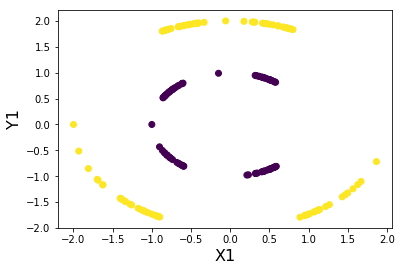

In [97]:
#class a shown in purple which is represent with 0 in new_class
#class b shown in yellow which is represent with 1 in new_class
plt.scatter(df['X1'],df['X2'],c=df['new_class'])
plt.xlabel('X1', fontsize=16)
plt.ylabel('Y1', fontsize=16)

### a) Apply PCA to reduce the number of dimensions to one and visualize the instances on a scatter plot. Note that the scatter plot will show the observation number versus the observed value (as we have a single feature to represent the instance).

In [98]:
X_features = df.iloc[:,0:2]
y_label = df.iloc[:, -1]

scaler = StandardScaler()
scaler.fit(X_features)
scaled_data = scaler.transform(X_features)

In [99]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component'])
principalDf.head()

,principal component
0,-0.962534
1,-0.875865
2,0.083294
3,0.304123
4,0.953320


In [100]:
finalDf = pd.concat([principalDf, df[['new_class']]], axis = 1)
finalDf= finalDf.reset_index()
finalDf.head()

,index,principal component,new_class
0,0,-0.962534,0
1,1,-0.875865,0
2,2,0.083294,0
3,3,0.304123,0
4,4,0.953320,0


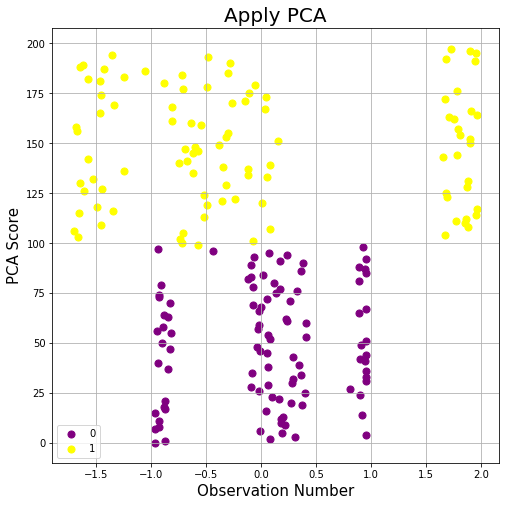

In [101]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Observation Number', fontsize = 15)
ax.set_ylabel('PCA Score', fontsize = 15)
ax.set_title('Apply PCA', fontsize = 20)
targets = [0,1]
colors = ['purple', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['new_class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component']
               , finalDf.loc[indicesToKeep, 'index']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### b) Apply MDS to reduce the number of dimensions to one and visualize the instances on a scatter plot as in part Use at least two different similarity measure

> dissimilarity{‘euclidean’, ‘precomputed’}, default=’euclidean’ Dissimilarity measure to use:

     1)‘euclidean’: Pairwise Euclidean distances between points in the dataset.
     2)‘precomputed’: Pre-computed dissimilarities are passed directly to fit and fit_transform.

In [102]:
# Calculation of euclidean distance matrix
x = euclidean_distances(X_features[X_features.columns[1:2]])
dist = pd.DataFrame(x)
dist.head()

,0,1,2,3,4,5,6,7,8,9,...,188,189,190,191,192,193,194,195,196,197
0,0.000000,0.089420,1.730733,0.211259,1.412860,0.123316,1.688823,0.007381,0.044636,0.143508,...,1.044376,1.057662,0.988474,1.673485,2.595820,1.064931,1.152806,1.987278,2.270808,2.551008
1,0.089420,0.000000,1.820154,0.300679,1.502280,0.212736,1.778243,0.096801,0.044785,0.232929,...,0.954956,0.968241,0.899054,1.762906,2.685240,0.975511,1.063386,2.076699,2.360228,2.640428
2,1.730733,1.820154,0.000000,1.519475,0.317873,1.607417,0.041910,1.723352,1.775369,1.587225,...,2.775109,2.788395,2.719208,0.057248,0.865087,2.795664,2.883540,0.256545,0.540074,0.820275
3,0.211259,0.300679,1.519475,0.000000,1.201601,0.087943,1.477564,0.203877,0.255894,0.067750,...,1.255635,1.268920,1.199733,1.462227,2.384561,1.276189,1.364065,1.776020,2.059549,2.339749
4,1.412860,1.502280,0.317873,1.201601,0.000000,1.289544,0.275963,1.405479,1.457496,1.269351,...,2.457236,2.470521,2.401334,0.260626,1.182960,2.477791,2.565666,0.574418,0.857948,1.138148


In [103]:
embedding = MDS(n_components=1, dissimilarity="precomputed")
transform_data = embedding.fit_transform(dist)
MDS_DF = pd.DataFrame(data = transform_data, columns = ["MDS"])

Final_MDS_DF = pd.concat([MDS_DF, df[['new_class']]], axis = 1)

Final_MDS_DF.reset_index(level=0, inplace=True)
Final_MDS_DF.head()

,index,MDS,new_class
0,0,-0.788763,0
1,1,-0.866442,0
2,2,0.714702,0
3,3,-0.605246,0
4,4,0.438570,0


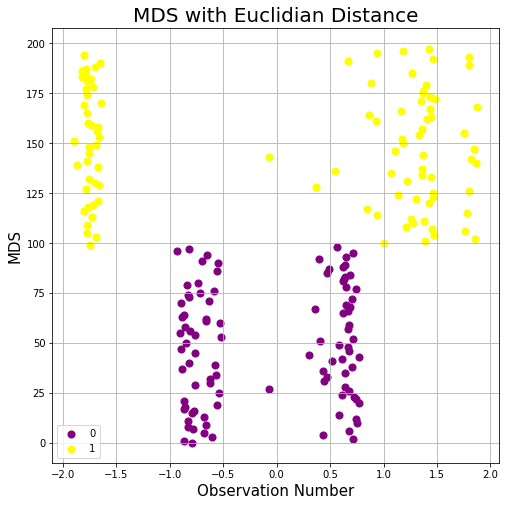

In [104]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Observation Number', fontsize = 15)
ax.set_ylabel('MDS', fontsize = 15)
ax.set_title('MDS with Euclidian Distance', fontsize = 20)
targets = [0,1]
colors = ['purple', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = Final_MDS_DF['new_class'] == target
    ax.scatter(Final_MDS_DF.loc[indicesToKeep, 'MDS']
               , Final_MDS_DF.loc[indicesToKeep, 'index']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


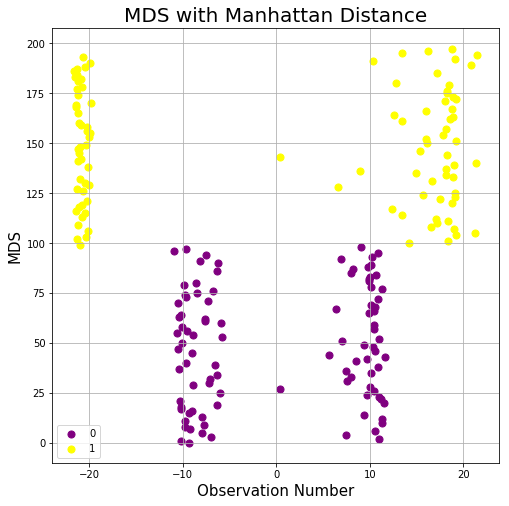

In [105]:
#Manhattan Distance
dist_manhattan = manhattan_distances(X_features[X_features.columns[1:2]])
distM = pd.DataFrame(dist_manhattan)

embedding = MDS(n_components=1)
transform_data_m = embedding.fit_transform(distM)
MDS_DF_M = pd.DataFrame(data = transform_data_m, columns = ["MDS"])

Final_MDS_DF_M = pd.concat([MDS_DF_M, df[['new_class']]], axis = 1)
Final_MDS_DF_M.reset_index(level=0, inplace=True)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Observation Number', fontsize = 15)
ax.set_ylabel('MDS', fontsize = 15)
ax.set_title('MDS with Manhattan Distance', fontsize = 20)
targets = [0,1]
colors = ['purple', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = Final_MDS_DF['new_class'] == target
    ax.scatter(Final_MDS_DF_M.loc[indicesToKeep, 'MDS']
               , Final_MDS_DF_M.loc[indicesToKeep, 'index']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### c)
### 1. What is your conclusion when you use PCA results in single dimension (your results from part a)?
>When we applied PCA on the non-linear data set we have, we saw that it did not help us much.
    If we are going to use PCA, we should pay attention to these:
           -Numeric data
           -Linear Relations between variables
### 2. What is your conclusion when you use MDS results in single dimension (your resultsfrom part b)? Compare the results from different similarity measures used in part (b)
>We used Euclidean and Manhattan distance in our work. Generally Manhattan Distance is preferred over the Euclidean distance metric as the dimension of the data increases. This occurs due to something known as the 'curse of dimensionality'. We don't have a large enough size to examine this difference, so we see similar results.
### 3. Compare MDS results with PCA. What is your conclusion?
>Compared to PCA, our results with MDS seem more plausible.We can say that it gives better results in nonlinear data. Because it works with distances compared to PCA. It can handle nonlinearities.

---------------------------------------------------------------------------------------------------------------------

###  d) Suppose, you are not satisfied with your dimensionality reduction scheme in part (a). Add the following columns to your data, X1'2,X2'2, X1× X2 (three columns as functions of your original variables) and apply PCA. Comment on the PCA results (i.e. what are the eigenvalues? What do they refer to?).

In [106]:
df["x1_squared"] = df["X1"]**2
df["x2_squared"] = df["X2"]**2
df["multiplication"] = df["X1"]*df["X2"]
df.head()

,X1,X2,class,new_class,x1_squared,x2_squared,multiplication
0,0.569483,0.822003,a,0,0.324311,0.675689,0.468117
1,0.411469,0.911424,a,0,0.169307,0.830693,0.375023
2,0.417385,-0.908730,a,0,0.174210,0.825790,-0.379290
3,-0.791828,0.610745,a,0,0.626991,0.373009,-0.483604
4,-0.806777,-0.590857,a,0,0.650889,0.349111,0.476689


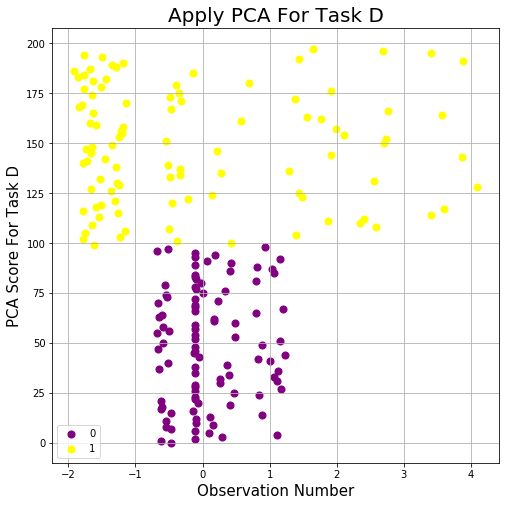

In [107]:
X_features = df.drop(['class','new_class'],axis=1)
target = df["new_class"]
scaler = StandardScaler()
scaler.fit(X_features)
scaled_data = scaler.transform(X_features)

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC2'])

finalDf_D = pd.concat([principalDf, df[['new_class']]], axis = 1)
finalDf_D= finalDf_D.reset_index()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Observation Number', fontsize = 15)
ax.set_ylabel('PCA Score For Task D', fontsize = 15)
ax.set_title('Apply PCA For Task D', fontsize = 20)
targets = [0,1]
colors = ['purple', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_D['new_class'] == target
    ax.scatter(finalDf_D.loc[indicesToKeep, 'PC2']
               , finalDf.loc[indicesToKeep, 'index']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [114]:
#df = df.drop(['class'], axis = 1)
scaled_data = StandardScaler().fit_transform(df) 
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
print("Eigenvalues for each component: ", pca.explained_variance_)

Eigenvalues for each component:  [1.99782454e+00 1.71711966e+00 1.29974408e+00 6.41492171e-01
 3.74276409e-01 1.59232351e-19]


### TASK 2 – Reconstructing Turkey Map

Suppose we apply MDS to this data to distance matrix to obtain latent variables in 2D dimensional
space. Represent the new feature space on a 2D plot. You are expected to label each data point with the
respective city’s name. This plot should be similar to Turkey map. Are there any unusual observations?

In [63]:
data = pd.read_excel('ilmesafe.xls',skiprows=3, index_col=None, header=None)
data = data.iloc[: , 1:]

data.replace(np.nan,0, inplace=True)

dist_m = np.asmatrix(data.iloc[:,1:])

# Calculation of euclidean distance matrix
x = euclidean_distances(dist_m)

scaled = StandardScaler().fit_transform(x)

In [73]:
MDS_features = MDS(n_components=2,).fit_transform(dist_m)
MDS_df = pd.DataFrame(MDS_features)
MDS_df.rename(columns={0: "Dim1", 1: "Dim2"}, inplace=True)
MDS_df.head()

/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


,Dim1,Dim2
0,-122.188335,-832.845128
1,1124.630432,-2323.636856
2,-2305.503651,1849.159263
3,3577.518335,-3034.872200
4,1285.832809,1457.033745


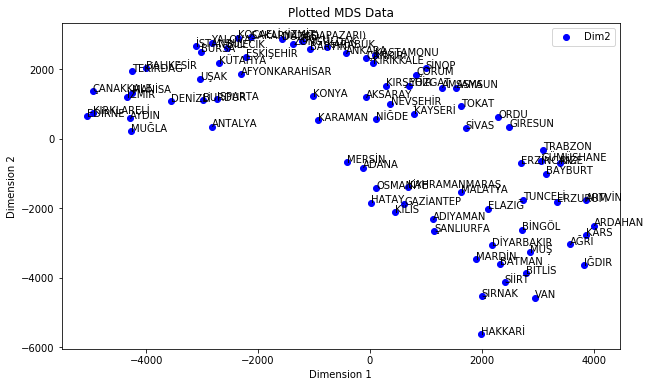

In [74]:
cities=data.iloc[:, 0]
plt.figure(figsize=(10,6))
plt.scatter(MDS_df.Dim1, MDS_df.Dim2, c = 'b')
# Loop through the data points 
for i, city in enumerate (cities):
    plt.text(MDS_df.Dim1[i]+0.2, MDS_df.Dim2[i]+0.2, city)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Plotted MDS Data')
plt.legend()
plt.show()

Even if we see a similarity in the formation of the map with mds, it gives us a far from reality.

### TASK 3 - Dimensionality reduction for time series data

The conference paper by Liu et al. (2009) starts with the following statement: “Gestures have recently become attractive for spontaneous interaction with consumer electronics and mobile devices in the context of pervasive computing”. The aim is to provide efficient personalized gesture recognition on wide range of devices. To achieve this, Liu et al. (2009) uses a single three-axis accelerometer to collect data from eight users to characterize eight gesture patterns. The library, uWaveGestureLibrary, consists over 4000 instances from 8 people with 8 different gestures, our aim is to visualize the gesture

>8 different gestures :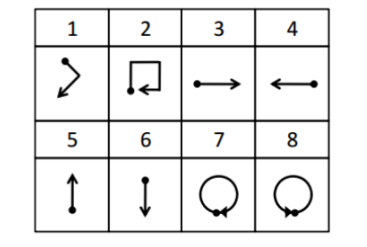



In [80]:
#Reading data
X_TRAIN = pd.read_csv("uWaveGestureLibrary_X_TRAIN",header=None,delim_whitespace=True)
Y_TRAIN = pd.read_csv("uWaveGestureLibrary_Y_TRAIN",header=None,delim_whitespace=True)
Z_TRAIN = pd.read_csv("uWaveGestureLibrary_Z_TRAIN",header=None,delim_whitespace=True)

In [81]:
classes = X_TRAIN[0]

In [82]:
df = pd.DataFrame(columns = ['Time Series ID','Time Index','X' ,'Y','Z','Class_Info'] ) 
df_ = df

for i in range(0,len(X_TRAIN)):
    df_['Time Index'] = range(1,316)
    df_['Time Series ID'] = i+1
    df_['Class_Info'] = X_TRAIN.iloc[i,0]
    df_['X'] = X_TRAIN.iloc[i,1:]
    df_['Y'] = Y_TRAIN.iloc[i,1:]
    df_['Z'] = Z_TRAIN.iloc[i,1:]
    
    df = pd.concat([df, df_], axis=0, sort=False)

df = df.iloc[316:,:]
df.head()

,Time Series ID,Time Index,X,Y,Z,Class_Info
1,1,2,-0.304243,-2.119396,-1.528965,6.0
2,1,3,-0.304243,-2.119396,-1.528965,6.0
3,1,4,-0.304243,-2.119396,-1.528965,6.0
4,1,5,-0.304243,-2.119396,-1.528965,6.0
5,1,6,-0.304243,-2.119396,-1.528965,6.0


In [83]:
cum_x = X_TRAIN.iloc[:, 1:316].cumsum(axis=1).cumsum(axis=1)
cum_y = Y_TRAIN.iloc[:, 1:316].cumsum(axis=1).cumsum(axis=1)
cum_z = Z_TRAIN.iloc[:, 1:316].cumsum(axis=1).cumsum(axis=1)

In [84]:
def dscatter(x,y,z, index):
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(x, y, z, color = "red")
    plt.title("3D scatter plot %s" %index )

In [44]:
classes = list(classes)
samples = []
for i in range(1,9):
    samples.append(classes.index(i))

In [45]:
samples

[10, 14, 3, 4, 1, 0, 6, 5]

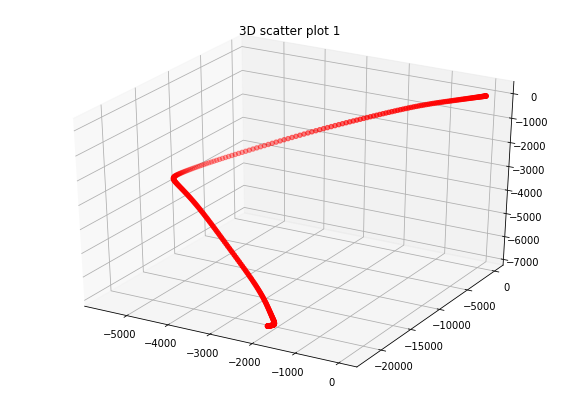

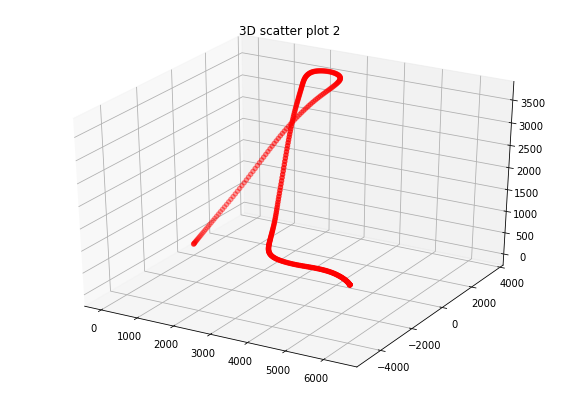

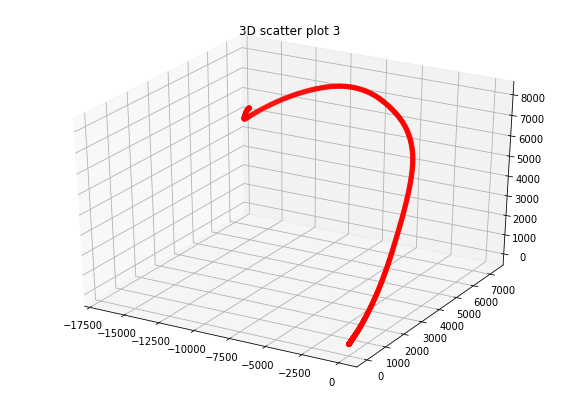

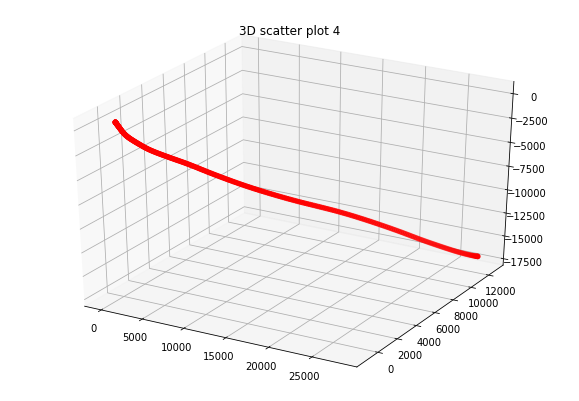

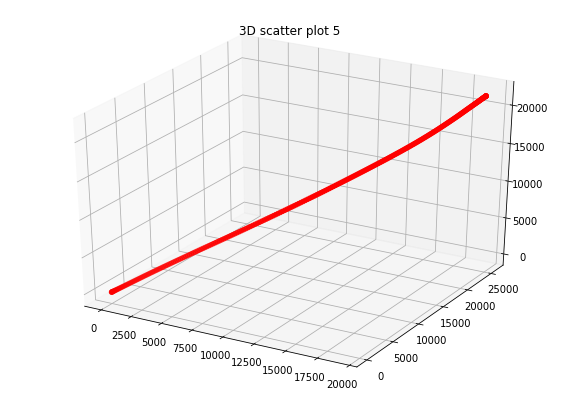

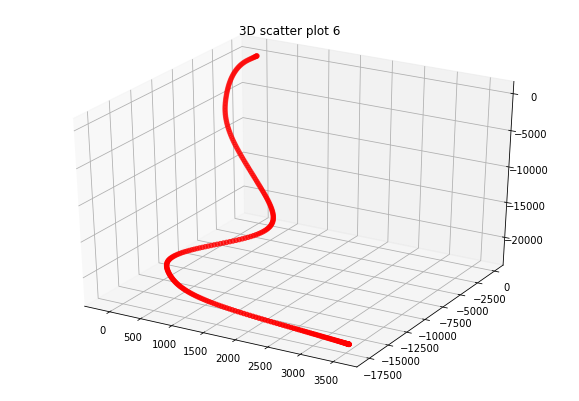

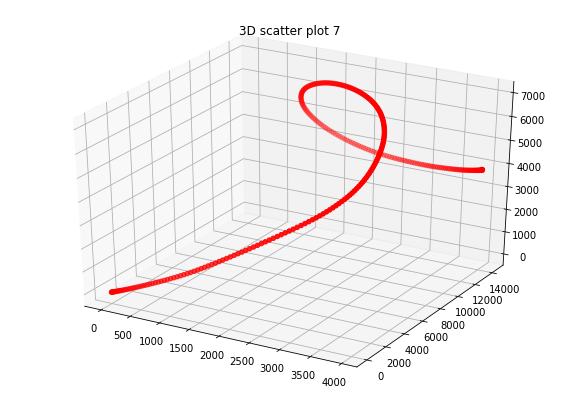

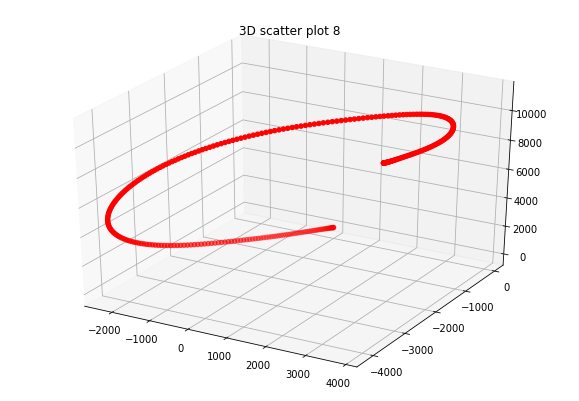

In [46]:
for i in samples:
    index = samples.index(i)
    dscatter(cum_x.iloc[i], cum_y.iloc[i], cum_z.iloc[i], int(index)+1 )

### Apply PCA to the time series from each class in the training data. You are expected to filter the data from each class and apply PCA to the representation. 
• How much variability can be recovered by the first two components?
• Draw the each eigenvector (component) as a time series for each class. What do the
eigenvectors imply in this setting? In total, you are expected to provide 8 plots. Each plot is
expected to provide two time series
Are there any interesting patterns/observations? 

In [87]:
df['X'] = df['X'].fillna(0)
df['Y'] = df['Y'].fillna(0)
df['Z'] = df['Z'].fillna(0)

In [88]:
df.head()

,Time Series ID,Time Index,X,Y,Z,Class_Info
1,1,2,-0.304243,-2.119396,-1.528965,6.0
2,1,3,-0.304243,-2.119396,-1.528965,6.0
3,1,4,-0.304243,-2.119396,-1.528965,6.0
4,1,5,-0.304243,-2.119396,-1.528965,6.0
5,1,6,-0.304243,-2.119396,-1.528965,6.0


In [89]:
pca = PCA(n_components=1)
component = pca.fit_transform(df[["X","Y","Z"]])

print("Explained variance",pca.explained_variance_)
print("Explained variance ratio: ",pca.explained_variance_ratio_)

Explained variance [1.46312478]
Explained variance ratio:  [0.49054389]


In [90]:
df["Principal Component"] = component
df.head()

,Time Series ID,Time Index,X,Y,Z,Class_Info,Principal Component
1,1,2,-0.304243,-2.119396,-1.528965,6.0,-2.492287
2,1,3,-0.304243,-2.119396,-1.528965,6.0,-2.492287
3,1,4,-0.304243,-2.119396,-1.528965,6.0,-2.492287
4,1,5,-0.304243,-2.119396,-1.528965,6.0,-2.492287
5,1,6,-0.304243,-2.119396,-1.528965,6.0,-2.492287


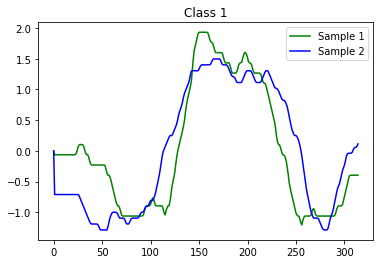

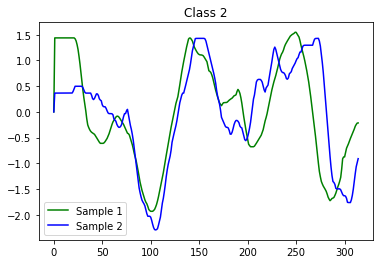

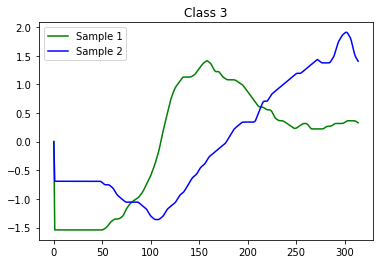

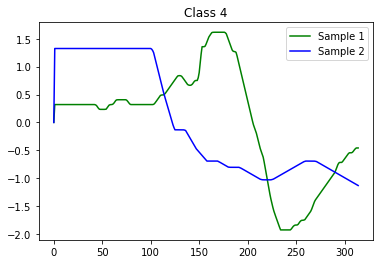

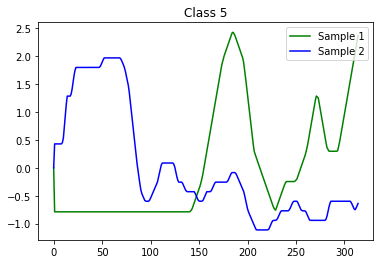

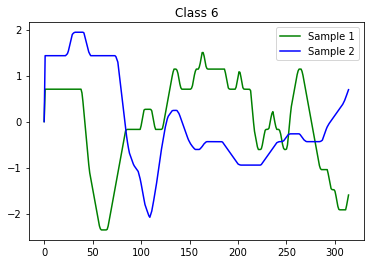

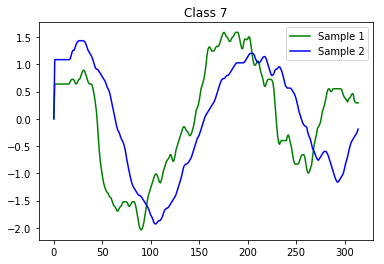

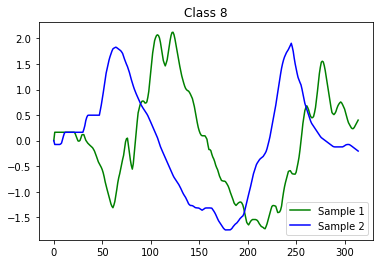

In [91]:
for i in range(1,9):
    sample_1 = random.choice(list(df[df["Class_Info"] == i]["Time Series ID"]))
    sample_2 = random.choice(list(df[df["Class_Info"] == i]["Time Series ID"]))

    sample1 = df[(df["Class_Info"] == i) & (df["Time Series ID"] == sample_1)].iloc[:,2] 
    sample2 = df[(df["Class_Info"] == i) & (df["Time Series ID"] == sample_2)].iloc[:,2] 

    plt.plot(sample1,color = "g")
    plt.plot(sample2,color = "b")
    plt.legend(["Sample 1", "Sample 2"])
    plt.title("Class {}".format(i))
    plt.show()

After plotting the 1D datas of two different random time series from each class, It seems like each class draw similar paths. It seems possible to classify instances and separate classes with visualization of the 1D data

In [92]:
for i in range(1,9):
    temp_df = df[df["Class_Info"] == i]
    pca = PCA(n_components = 1)
    temp_df["PCA"] = pca.fit_transform(temp_df[["X","Y","Z"]])
    ratio = pca.explained_variance_ratio_
    print("Class", i)
    print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Class 1
Explained Variance Ratio:  [0.46259965]
Class 2
Explained Variance Ratio:  [0.51278732]
Class 3
Explained Variance Ratio:  [0.54157321]
Class 4
Explained Variance Ratio:  [0.54980066]
Class 5
Explained Variance Ratio:  [0.64719254]
Class 6
Explained Variance Ratio:  [0.57161494]
Class 7
Explained Variance Ratio:  [0.51941001]
Class 8
Explained Variance Ratio:  [0.61344806]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: